In [1]:
# Get to the sample DIR
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/Combined_Upperlimit/set_07_AroundMassPoint_AddBG_ThresholdMass/
%ls Combine_Mass_110

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/Combined_Upperlimit/set_07_AroundMassPoint_AddBG_ThresholdMass
combine_logger.out
Data_Card_Combine_mh110.dat
higgsCombineTest.HybridNew.mH110.1.quant0.025.root
higgsCombineTest.HybridNew.mH110.1.quant0.160.root
higgsCombineTest.HybridNew.mH110.1.quant0.500.root
higgsCombineTest.HybridNew.mH110.1.quant0.840.root
higgsCombineTest.HybridNew.mH110.1.quant0.975.root
higgsCombineTest.HybridNew.mH110.1.root


In [2]:
Mass_points={}
# Check check current dir that is dir
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist, uproot
import mplhep as hep
import awkward as ak
directories = [entry.name for entry in os.scandir() if entry.is_dir()]
for dir in directories:
    if "Combine_Mass_" in dir:
        mass_point = dir.split("_")[-1]
        q025=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.025.root")['limit;1'].arrays()['limit'][0]
        q16=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.160.root")['limit;1'].arrays()['limit'][0]
        q50=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.500.root")['limit;1'].arrays()['limit'][0]
        q84=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.840.root")['limit;1'].arrays()['limit'][0]
        q975=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.975.root")['limit;1'].arrays()['limit'][0]
        median=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.root")['limit;1'].arrays()['limit'][0]
        Mass_points[mass_point]=[q025, q16, [q50,median], q84, q975]

In [3]:
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/Combined_Upperlimit/set_09_HighMass30windows/
dir2=[entry.name for entry in os.scandir() if entry.is_dir()]
for dir_ in dir2:
    if "Combine_Mass_" in dir_:
        mass_point = dir_.split("_")[-1]
        q025=uproot.open(f"{dir_}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.025.root")['limit;1'].arrays()['limit'][0]
        q16=uproot.open(f"{dir_}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.160.root")['limit;1'].arrays()['limit'][0]
        q50=uproot.open(f"{dir_}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.500.root")['limit;1'].arrays()['limit'][0]
        q84=uproot.open(f"{dir_}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.840.root")['limit;1'].arrays()['limit'][0]
        q975=uproot.open(f"{dir_}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.975.root")['limit;1'].arrays()['limit'][0]
        median=uproot.open(f"{dir_}/higgsCombineTest.HybridNew.mH{mass_point}.1.root")['limit;1'].arrays()['limit'][0]
        Mass_points[mass_point]=[q025, q16, [q50,median], q84, q975]

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/Combined_Upperlimit/set_09_HighMass30windows


In [4]:
key_sorted = sorted(np.int_(list(Mass_points.keys())))
target_vals_first = []
target_vals_second = []
for key in key_sorted:
    if float(key) < 150:
        qunatiles=Mass_points[str(key)]
        target_vals_first.append(qunatiles)
    else:
        qunatiles=Mass_points[str(key)]
        target_vals_second.append(qunatiles)
target_vals_first = ak.Array(target_vals_first)
target_vals_second = ak.Array(target_vals_second)

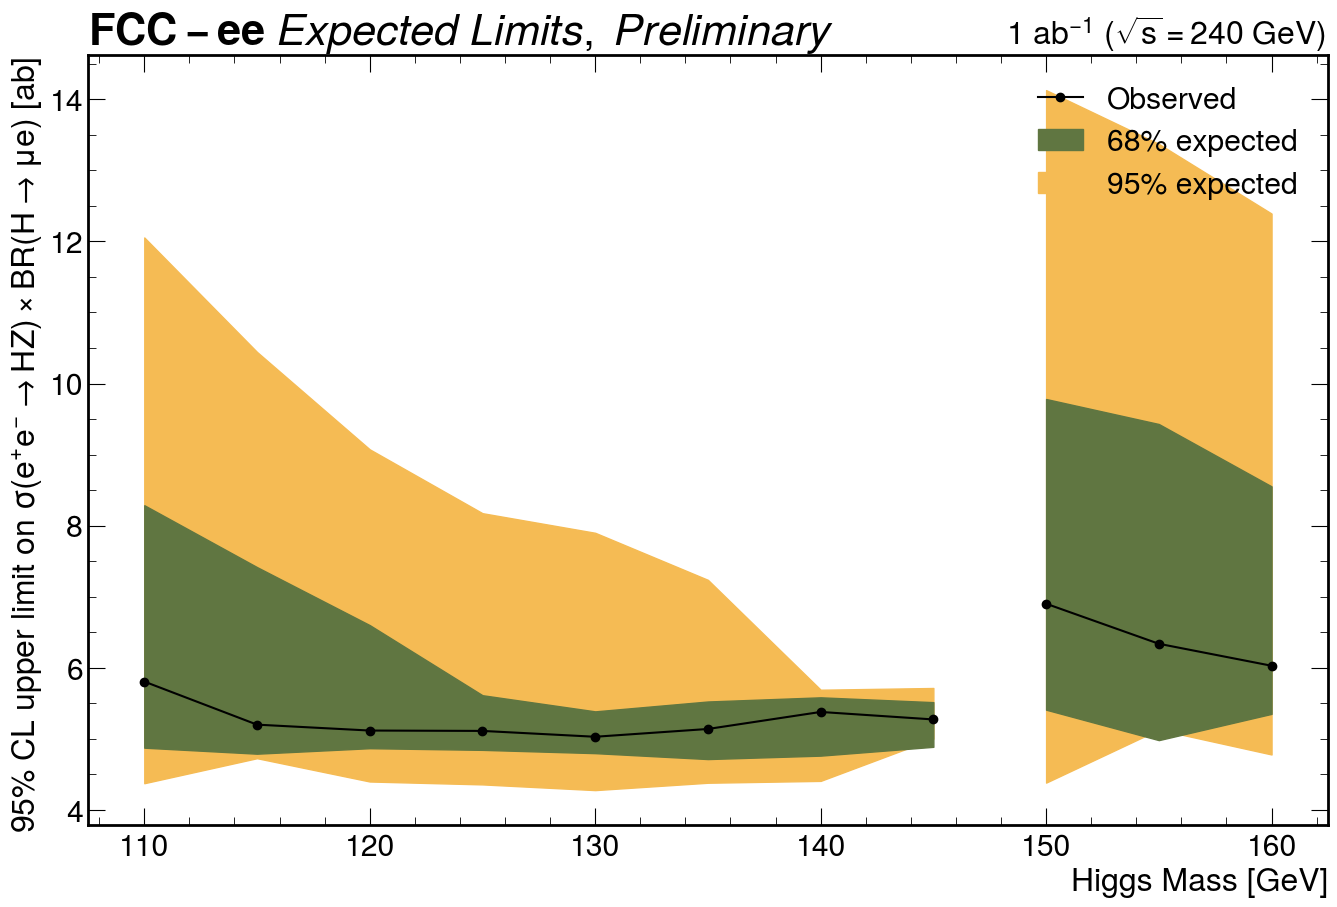

In [5]:
x = key_sorted[:-3]
xx= key_sorted[-3:]
y1 = list(target_vals_first[:,0])
y2 = list(target_vals_first[:,1])
y3 = [i[0] for i in target_vals_first[:,2]]
y4 = list(target_vals_first[:,3])
y5 = list(target_vals_first[:,4])
yy1 = list(target_vals_second[:,0])
yy2 = list(target_vals_second[:,1])
yy3 = [i[0] for i in target_vals_second[:,2]]
yy4 = list(target_vals_second[:,3])
yy5 = list(target_vals_second[:,4])
# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(1,1,1)

green = '#607641' 
yellow = '#F5BB54' 
plt.plot(x, y3, color='k', marker='o', label = "Observed", zorder=10)
plt.fill_between(np.asarray(x), 
                 np.asarray(y4), 
                 np.asarray(y2), color=green, label = "68% expected", zorder=3)
plt.fill_between(np.asarray(x), 
                 np.asarray(y5), 
                 np.asarray(y1), color=yellow, label = "95% expected")

plt.plot(xx, yy3, color='k', marker='o', zorder=10)
plt.fill_between(np.asarray(xx), 
                 np.asarray(yy4), 
                 np.asarray(yy2), color=green, zorder=3)
plt.fill_between(np.asarray(xx), 
                 np.asarray(yy5), 
                 np.asarray(yy1), color=yellow)

# plt.ylim(3.5,6)
# Style
# hep.cms.label("Preliminary", data = False)
plt.title(r"$\mathbf{FCC-ee}$ $\it{Expected}$ $\it{Limits},$ $\it{Preliminary}$", loc='left')
plt.title(r"1 ab$^{-1}$ ($\sqrt{s} = 240$ GeV) ", loc='right', fontsize=23)
ax.set_ylabel(r"95% CL upper limit on $\sigma(e^{+}e^{-} \rightarrow HZ) \times \mathrm{BR}(H \rightarrow \mu e)$ [ab]", fontsize=23)
# Style
plt.legend(loc="upper right")
ax.set_xlabel("Higgs Mass [GeV]", fontsize=23)
plt.setyrange = (3, 7)
plt.savefig("FCCee_Expected_Limits_HtoMuE_1ab-1_240GeV.pdf")

In [6]:
y3

[5.8039001962689944,
 5.197528365695311,
 5.1144749864554235,
 5.10918655554045,
 5.026925693638696,
 5.136516422191259,
 5.376225124086101,
 5.2706505254873735]

In [7]:
# for changed signal yield base generation
x = key_sorted
y1 = list(target_vals[:,0])
y2 = list(target_vals[:,1])
y3 = [i[1] for i in target_vals[:,2]]
y4 = list(target_vals[:,3])
y5 = list(target_vals[:,4])
xsec_multiplier = np.array([
    1.35,
    1.24,
    1.12,
    1,
    0.868,
    0.723,
    0.558,
    0.349
    ])

# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(1,1,1)

green = '#607641' 
yellow = '#F5BB54' 
plt.plot(x, y3*np.asarray(xsec_multiplier), color='k', marker='o', label = "Observed", zorder=10)
plt.fill_between(np.asarray(x), 
                 np.asarray(y4)*np.asarray(xsec_multiplier), 
                 np.asarray(y2)*np.asarray(xsec_multiplier), color=green, label = "68% expected", zorder=3)
plt.fill_between(np.asarray(x), 
                 np.asarray(y5)*np.asarray(xsec_multiplier), 
                 np.asarray(y1)*np.asarray(xsec_multiplier), color=yellow, label = "95% expected")

# plt.ylim(3.5,6)
# Style
# hep.cms.label("Preliminary", data = False)
plt.title(r"$\mathbf{FCC-ee}$ $\it{Expected}$ $\it{Limits},$ $\it{Preliminary}$", loc='left')
plt.title(r"1 ab$^{-1}$ ($\sqrt{s} = 240$ GeV) ", loc='right', fontsize=23)
ax.set_ylabel(r"95% CL upper limit on $\sigma(e^{+}e^{-} \rightarrow HZ) \times \mathrm{BR}(H \rightarrow \mu e)$ [ab]", fontsize=23)
# Style
plt.legend(loc=1)
ax.set_xlabel("Higgs Mass [GeV]", fontsize=23)
plt.savefig("FCCee_Expected_Limits_HtoMuE_1ab-1_240GeV.pdf")

NameError: name 'target_vals' is not defined

TypeError: Conversion of irreducible unions to backend arrays is not supported.

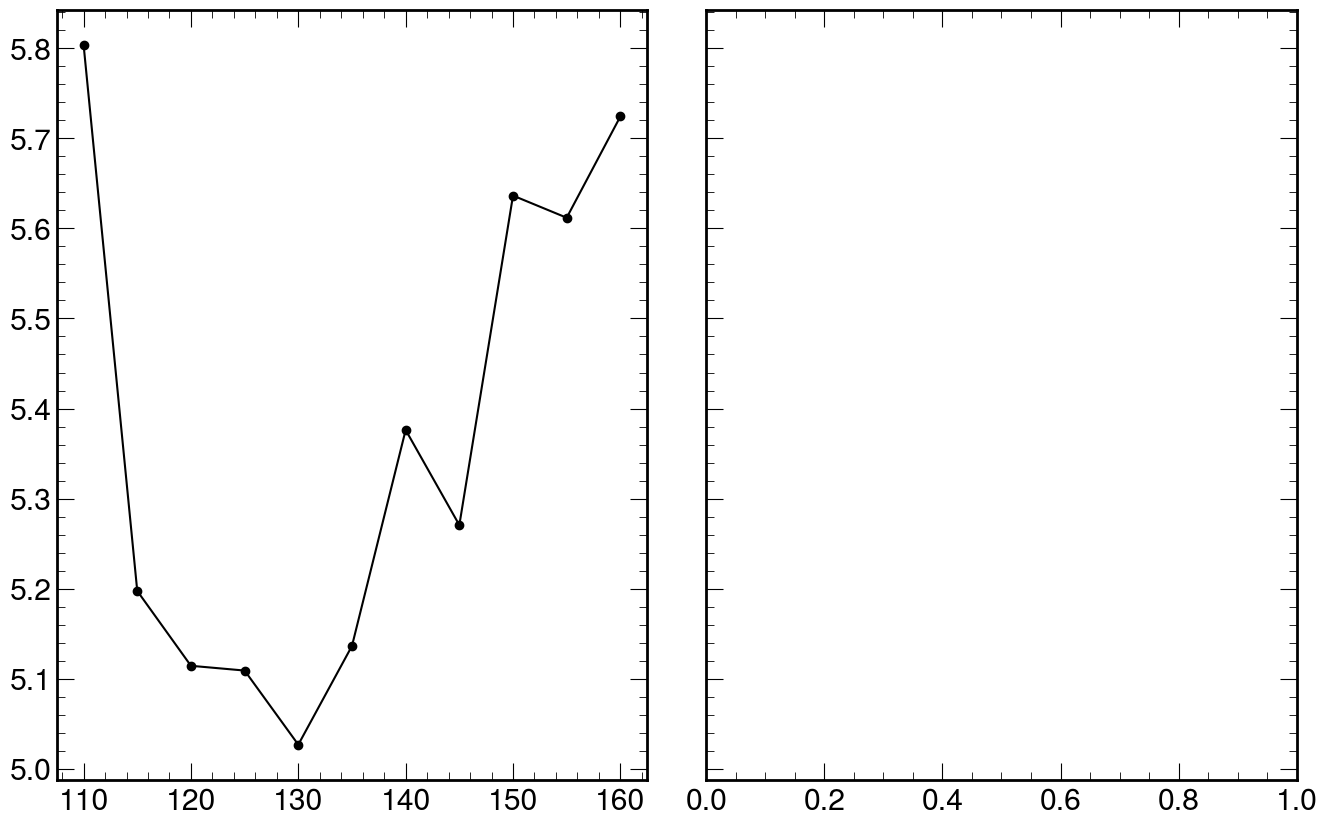

In [ ]:
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

# --- Your Data Loading Here ---
# x = key_sorted ...
# y1 = ... 

# Load CMS style
plt.style.use(hep.style.CMS)

# 1. Setup Figure: Create 2 side-by-side subplots that share the Y-axis
#    wspace=0.1 controls the width of the "cut" gap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), sharey=True)
fig.subplots_adjust(wspace=0.1) 

# 2. Plot the SAME data on BOTH axes
#    (We will hide the unwanted parts using xlim later)
green = '#607641' 
yellow = '#F5BB54' 

for ax in (ax1, ax2):
    ax.plot(x, y3, color='k', marker='o', label="Observed", zorder=10)
    ax.fill_between(np.asarray(x), np.asarray(y4), np.asarray(y2), color=green, label="68% expected", zorder=3)
    ax.fill_between(np.asarray(x), np.asarray(y5), np.asarray(y1), color=yellow, label="95% expected")

# 3. Set the Limits to create the "Split"
#    Left plot: Shows up to 110
#    Right plot: Starts from 150
ax1.set_xlim(90, 110)   # Adjust '90' to your actual start
ax2.set_xlim(150, 180)  # Adjust '180' to your actual end
ax1.set_ylim(3, 7)      # Set Y-limits once (applies to both)

# 4. Add the "Broken Axis" Diagonal Lines
d = 0.015  # Size of the diagonal cut marks
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)        # Top-right diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)              # Bottom-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch coordinates to right plot
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)              # Top-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)                    # Bottom-left diagonal

# 5. Hide the borders (spines) between the plots
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.tick_params(right=False) # Remove ticks on the split side
ax2.tick_params(left=False) 

# 6. Labels and Titles
#    Y-label goes on the left plot
ax1.set_ylabel(r"95% CL upper limit on $\sigma(e^{+}e^{-} \rightarrow HZ) \times \mathrm{BR}(H \rightarrow \mu e)$ [ab]", fontsize=23)

#    X-label is shared, so we place it manually in the center
fig.text(0.5, 0.04, "Higgs Mass [GeV]", ha='center', fontsize=23)

#    Titles: Split them visually
ax1.set_title(r"$\mathbf{FCC-ee}$ $\it{Expected}$ $\it{Limits},$ $\it{Preliminary}$", loc='left')
ax2.set_title(r"1 ab$^{-1}$ ($\sqrt{s} = 240$ GeV) ", loc='right', fontsize=23)

#    Legend (only on the right plot)
ax2.legend(loc="upper right")

plt.savefig("FCCee_Expected_Limits_Split.pdf")
plt.show()